In [ ]:
!pip install networkx==2.5

In [ ]:
#!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib
import random
import community as community_louvain
import community.community_louvain as community_louvain
from networkx.algorithms.community.centrality import girvan_newman

In [ ]:
file_path = '/content/TEST.csv'
data = pd.read_csv(file_path)

data.head()

,id,followersCount,friendsCount,768938323612008448,736409486949122048,745695548246720513,715886426387120129,713030233054511105,707387411316080642,746928595075891200,...,2422636526,430342127,820051950,2344386542,129400817,153845743,20250612,145129460,3390046198,394297339
0,1969527638,319,112,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51878493,275,115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1393409100,120,107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,232891415,492,325,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,710130422907207680,128,218,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


> Le graphe cree a partir de nos donnees contient 19757 noeuds et 21394 aretes

In [ ]:
G = nx.DiGraph()

for index, row in data.iterrows():
    node_id = row['id']

    node_attributes = row.to_dict()
    G.add_node(node_id, **node_attributes)

    for column in data.columns:
        if column != 'id' and row[column] == 1:
            target_id = column
            G.add_edge(node_id, target_id)

basic_info = nx.info(G)
basic_info


'Name: \nType: DiGraph\nNumber of nodes: 19757\nNumber of edges: 21394\nAverage in degree:   1.0829\nAverage out degree:   1.0829'

# 1- Visualisation du Reseau




> Une visualisation d un sous graphe du reseau compose de 200 noeud alors que normalement on a 19757

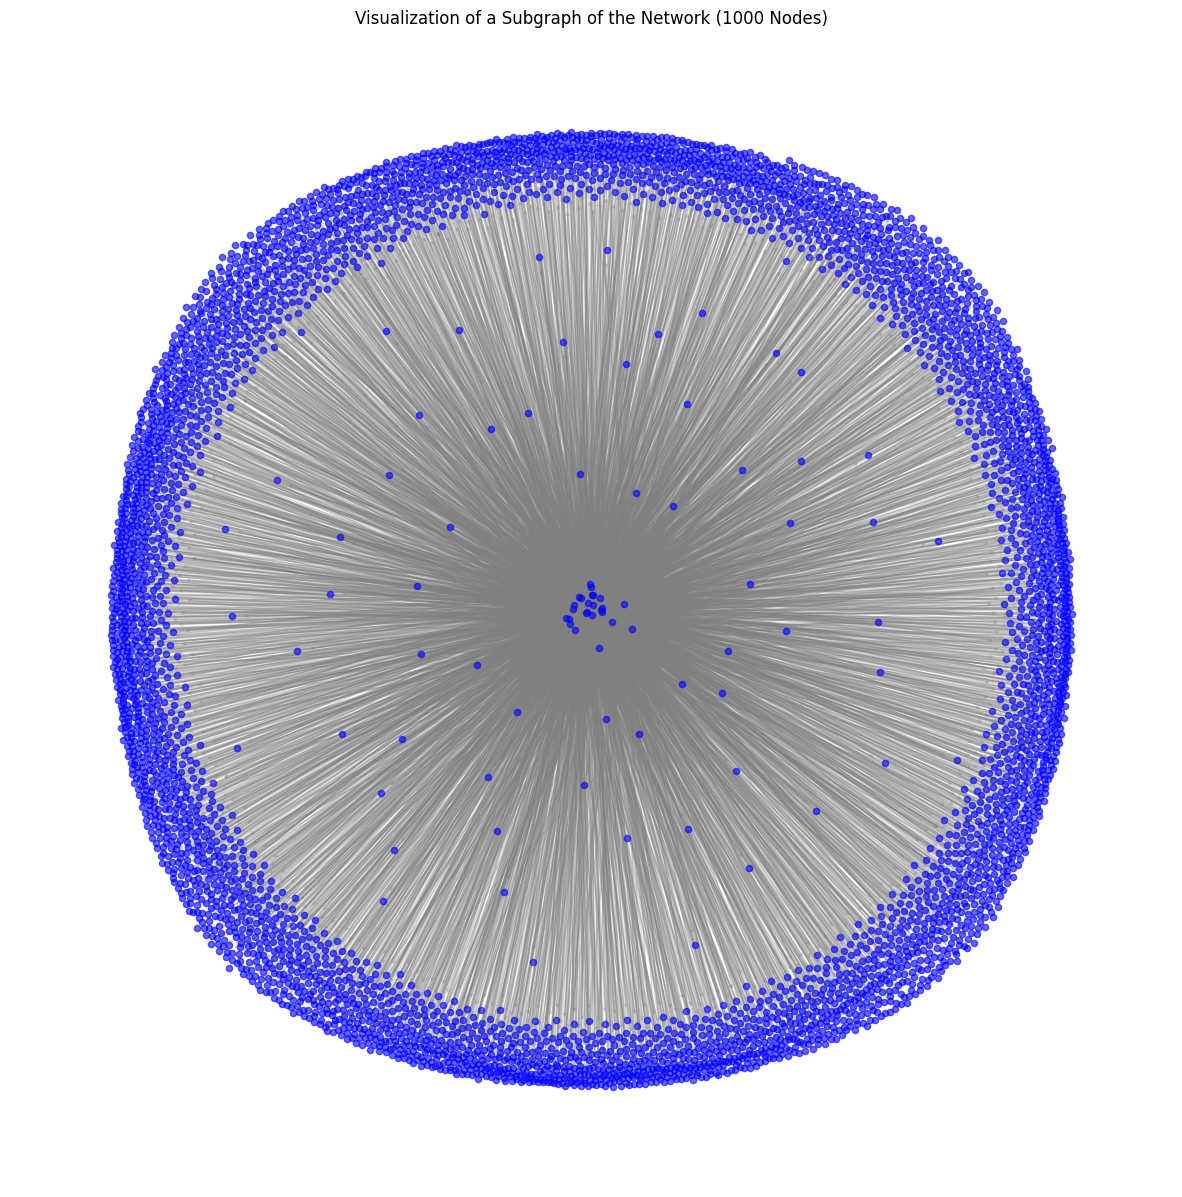

In [ ]:
subgraph_nodes = list(G.nodes)[:5000]
subgraph = G.subgraph(subgraph_nodes)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw_networkx_nodes(subgraph, pos, node_size=20, node_color='blue', alpha=0.6)
nx.draw_networkx_edges(subgraph, pos, arrowstyle='->', arrowsize=5, edge_color='gray', alpha=0.3)
plt.title("Visualization of a Subgraph of the Network (1000 Nodes)")
plt.axis('off')
plt.show()

# 2- Calcul du Degre des Noeuds et Distribution des Degres

> Les histogrammes representent les distributions des degres entrants (in-degree)
et sortants (out-degree) du reseau.


> Ces distributions permettent d observer la frequence des noeuds ayant un certain nombre de connexions entrantes et sortantes souvent indicatif de la nature des hubs et de la connectivite globale du réseau.

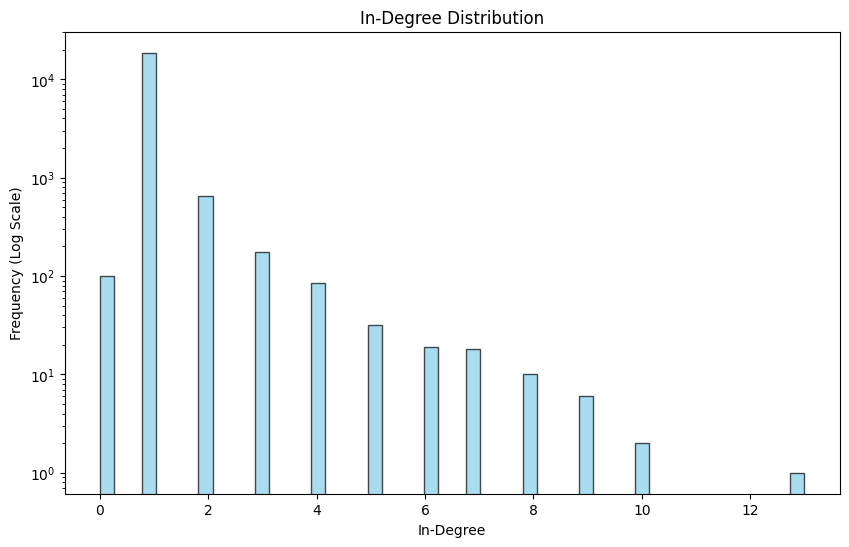

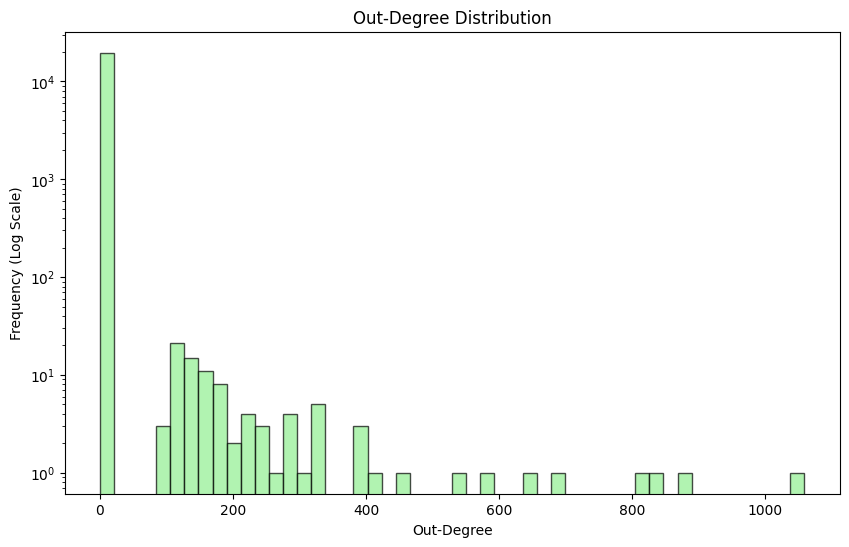

In [ ]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())

plt.figure(figsize=(10, 6))
plt.hist(in_degree_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.xlabel('In-Degree')
plt.ylabel('Frequency (Log Scale)')
plt.title('In-Degree Distribution')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(out_degree_values, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency (Log Scale)')
plt.title('Out-Degree Distribution')
plt.show()


# 3- Calcul du coefficient de clustering

> Les resultats montrent que le coefficient de clustering local est egal à 0 pour les 10 premiers noeuds de l echantillon ce qui signifie qu il n y a pas de triangles (Cad que les voisins de chaque noeud ne sont pas connectes entre eux).

> Le coefficient de clustering global est egalement de 0, indiquant l absence de triades dans le graphe a une echelle plus large

In [ ]:
local_clustering = nx.clustering(G)
average_clustering = nx.average_clustering(G)

local_clustering_sample = {k: local_clustering[k] for k in list(local_clustering.keys())}
average_clustering_value = average_clustering

local_clustering_sample, average_clustering_value


({1969527638: 0,
  '1969422638': 0,
  '1969685018': 0,
  '1969947438': 0,
  '1970013110': 0,
  '1969259820': 0,
  '1970144676': 0,
  '1969751576': 0,
  '1969751588': 0,
  '1970046536': 0,
  '1969686674': 0,
  '1969457936': 0,
  '1969294814': 0,
  '1969295556': 0,
  '1969689272': 0,
  '1969754851': 0,
  '1969787869': 0,
  '1969526874': 0,
  '1969920092': 0,
  '1969887518': 0,
  '1970149771': 0,
  '1969298065': 0,
  '1969298856': 0,
  '1969331652': 0,
  '1969692529': 0,
  '1969430539': 0,
  '1969692698': 0,
  '1969791680': 0,
  '1969365936': 0,
  '1969563175': 0,
  '1970153138': 0,
  '1969662210': 0,
  '1969302314': 0,
  '1969302888': 0,
  '1969565263': 0,
  '1969631580': 0,
  '1969893793': 0,
  '1969501046': 0,
  '1970090934': 0,
  '1970025554': 0,
  '1969698176': 0,
  '1969337952': 0,
  '1969797386': 0,
  '1969601096': 0,
  '1970158393': 0,
  '1969535827': 0,
  '1969437804': 0,
  '1969536164': 0,
  '1970224440': 0,
  '1969667533': 0,
  '1969668032': 0,
  '1969504268': 0,
  '1969734134'

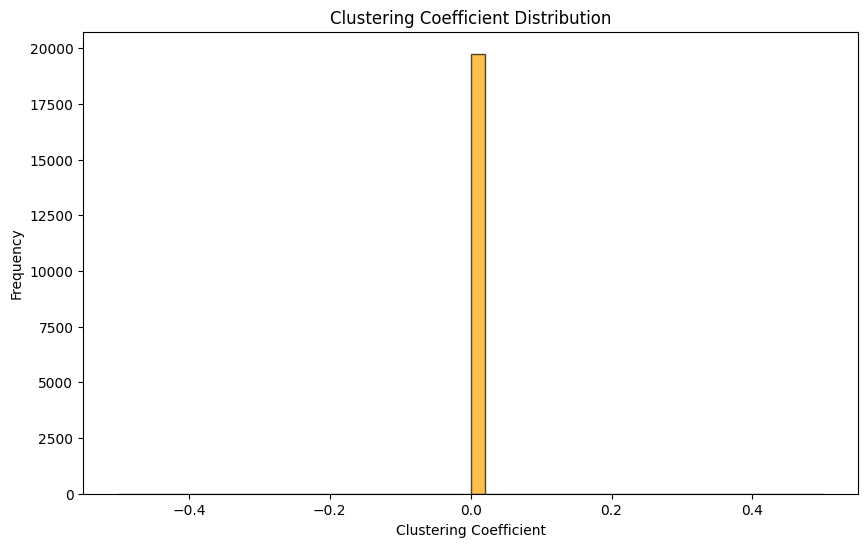

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(local_clustering.values(), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()

# 4- les mesures de centralite


> **Centralite de Degre** : La valeur est generalement faible pour la majorite des noeuds mais certains noeuds ont des degres legerement plus eleves Cela reflete le nombre de connexions directes que chaque noeud a dans le reseau.



> **Centralite de Proximite (Closeness) :** Ces valeurs sont egalement assez faibles ce qui est typique dans des reseaux peu connectes comme le notre Cela signifie que la distance moyenne d un noeud aux autres est assez elevee.




> **Centralite de Mediation (Betweenness) :** Les valeurs pour cette mesure sont toutes egales a 0 indiquant que les noeuds de l echantillon ne se trouvent sur aucun des chemins les plus courts qui relient d autres paires de noeuds Cela suggere que ces noeuds ne jouent pas de role important dans la transmission de l information dans le reseau.



In [ ]:
degree_centrality = nx.degree_centrality(G)

closeness_centrality = nx.closeness_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G, k=500, normalized=True, seed=42)

degree_centrality_sample = {k: degree_centrality[k] for k in list(degree_centrality.keys())[:10]}
closeness_centrality_sample = {k: closeness_centrality[k] for k in list(closeness_centrality.keys())[:10]}
betweenness_centrality_sample = {k: betweenness_centrality[k] for k in list(betweenness_centrality.keys())[:10]}

degree_centrality_sample, closeness_centrality_sample, betweenness_centrality_sample

({1969527638: 0.005669163798339745,
  '1969422638': 5.061753391374772e-05,
  '1969685018': 5.061753391374772e-05,
  '1969947438': 5.061753391374772e-05,
  '1970013110': 5.061753391374772e-05,
  '1969259820': 5.061753391374772e-05,
  '1970144676': 5.061753391374772e-05,
  '1969751576': 5.061753391374772e-05,
  '1969751588': 5.061753391374772e-05,
  '1970046536': 5.061753391374772e-05},
 {1969527638: 0.0,
  '1969422638': 5.061753391374772e-05,
  '1969685018': 5.061753391374772e-05,
  '1969947438': 5.061753391374772e-05,
  '1970013110': 5.061753391374772e-05,
  '1969259820': 5.061753391374772e-05,
  '1970144676': 5.061753391374772e-05,
  '1969751576': 5.061753391374772e-05,
  '1969751588': 5.061753391374772e-05,
  '1970046536': 5.061753391374772e-05},
 {1969527638: 0.0,
  '1969422638': 0.0,
  '1969685018': 0.0,
  '1969947438': 0.0,
  '1970013110': 0.0,
  '1969259820': 0.0,
  '1970144676': 0.0,
  '1969751576': 0.0,
  '1969751588': 0.0,
  '1970046536': 0.0})

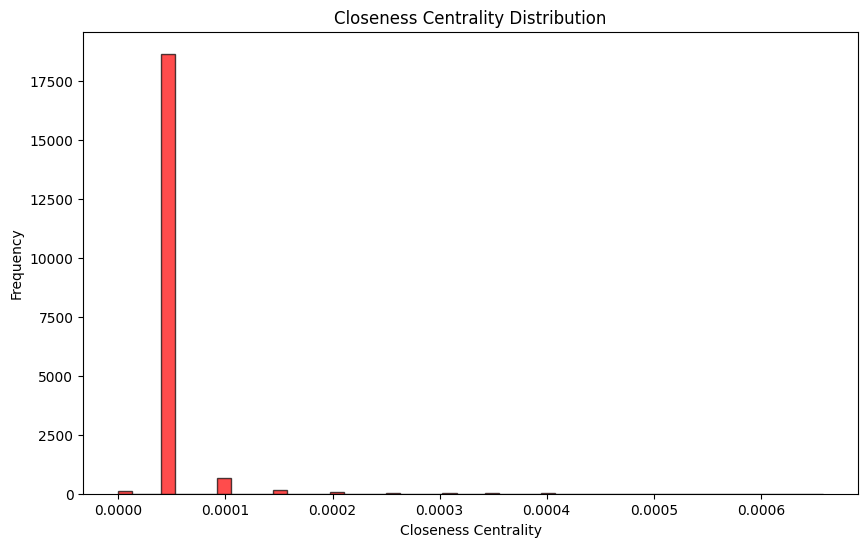

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=50, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()

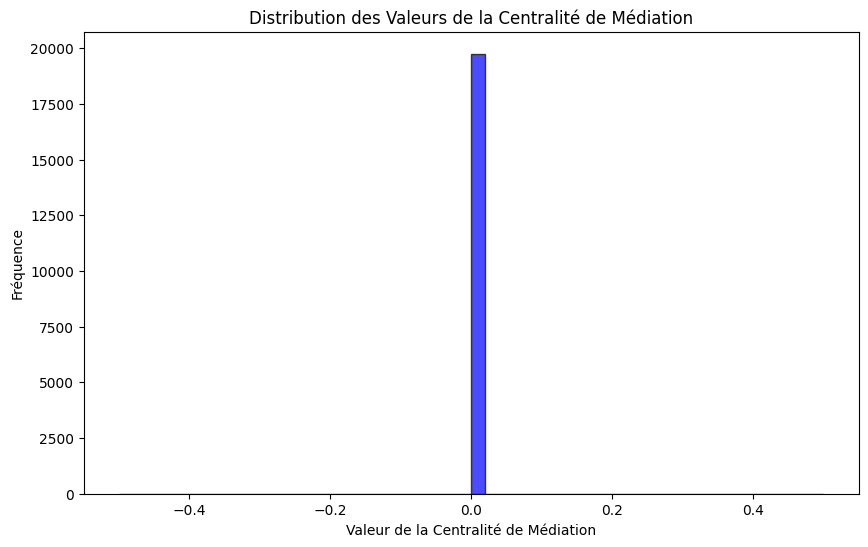

Top 10 des nœuds par centralité de médiation :
Noeud: 1969527638, Centralité de Médiation: 0.0
Noeud: 1969422638, Centralité de Médiation: 0.0
Noeud: 1969685018, Centralité de Médiation: 0.0
Noeud: 1969947438, Centralité de Médiation: 0.0
Noeud: 1970013110, Centralité de Médiation: 0.0
Noeud: 1969259820, Centralité de Médiation: 0.0
Noeud: 1970144676, Centralité de Médiation: 0.0
Noeud: 1969751576, Centralité de Médiation: 0.0
Noeud: 1969751588, Centralité de Médiation: 0.0
Noeud: 1970046536, Centralité de Médiation: 0.0


In [ ]:
betweenness_values = list(betweenness_centrality.values())

plt.figure(figsize=(10, 6))
plt.hist(betweenness_values, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Valeur de la Centralité de Médiation')
plt.ylabel('Fréquence')
plt.title('Distribution des Valeurs de la Centralité de Médiation')
plt.show()

top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("Top 10 des nœuds par centralité de médiation :")
for node, value in top_betweenness_nodes:
    print(f"Noeud: {node}, Centralité de Médiation: {value}")


# 5- Analyse des distances / la longueur des plus courts chemins/  le diamètre / la distance moyenne dans le reseau

> le sous graphe n est pas completement connecte puisqu on a utilise que 100 lignes de notre data ce qui empeche le calcul du diametre et de la longueur moyenne des chemins.




In [ ]:

largest_cc = max(nx.weakly_connected_components(G), key=len)
subgraph_largest_cc = G.subgraph(largest_cc)

undirected_subgraph = subgraph_largest_cc.to_undirected()

try:
    diameter = nx.diameter(undirected_subgraph)
except nx.NetworkXError:
    diameter = "Graph is not connected, cannot compute diameter."

try:
    avg_path_length = nx.average_shortest_path_length(undirected_subgraph)
except nx.NetworkXError:
    avg_path_length = "Graph is not connected, cannot compute average path length."

diameter, avg_path_length


(8, 5.296032051619021)

# 6- Analyse des composantes connexes


> L analyse des composantes connexes montre que le graphe possede une tres grande composante contenant 18 818 noeuds ce qui constitue la majeure partie du reseau tandis que le reste du graphe est constitue de petites composantes isolees.



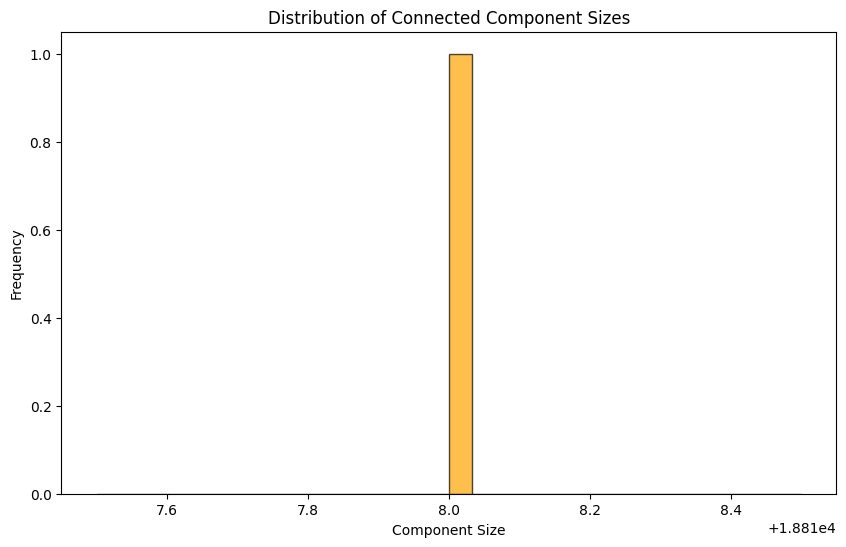

(18818, 1)

In [ ]:
connected_components = list(nx.connected_components(undirected_subgraph))
component_sizes = [len(comp) for comp in connected_components]

largest_component_size = max(component_sizes)

number_of_components = len(connected_components)

plt.figure(figsize=(10, 6))
plt.hist(component_sizes, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.title('Distribution of Connected Component Sizes')
plt.show()

largest_component_size, number_of_components

# 7- Structure en "core" du graphe en analysant les k-cores

> **Maximum Coreness :** 5 — Le plus grand k-core est de degre 5, ce qui signifie qu il existe une partie du reseau où chaque noeud a au moins 5 connexions.

> **Minimum Coreness :** 0 — Certains noeuds sont isoles ou faiblement connectes.

> **Average Coreness :** 1.09 — Cela indique que la plupart des noeuds ont une faible densite de connexion correspondant a une structure peu connectee.

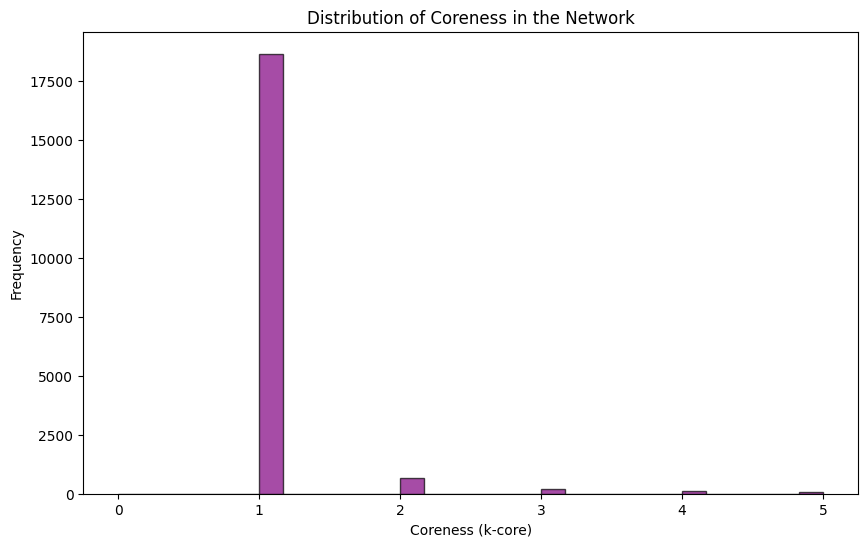

{'Maximum Coreness': 5,
 'Minimum Coreness': 0,
 'Average Coreness': 1.0901958799412865}

In [ ]:
k_core_dict = nx.core_number(G)

core_numbers = list(k_core_dict.values())

plt.figure(figsize=(10, 6))
plt.hist(core_numbers, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Coreness (k-core)')
plt.ylabel('Frequency')
plt.title('Distribution of Coreness in the Network')
plt.show()

core_stats = {
    "Maximum Coreness": max(core_numbers),
    "Minimum Coreness": min(core_numbers),
    "Average Coreness": sum(core_numbers) / len(core_numbers)
}
core_stats


# 8- Analyse de la detection de communautes avec la methode de Girvan-Newman

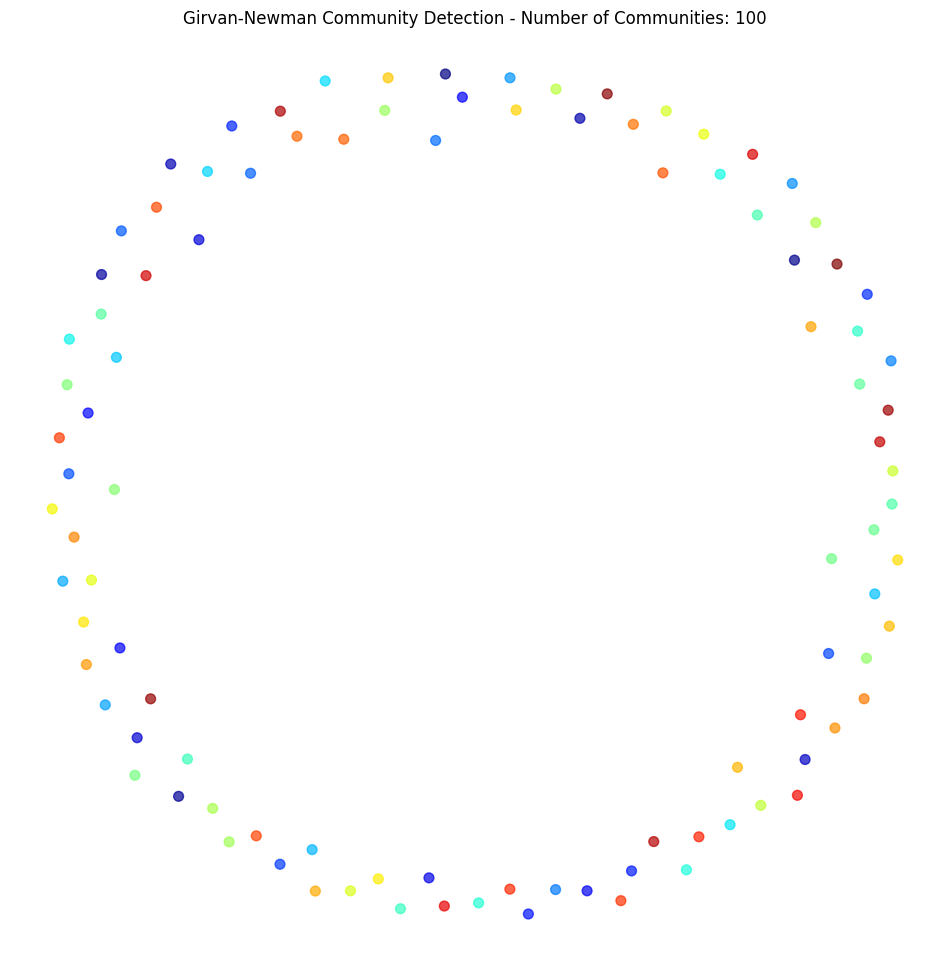

100

In [ ]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
subgraph_largest_cc = G.subgraph(largest_cc)

undirected_subgraph = subgraph_largest_cc.to_undirected()

subgraph_sample = undirected_subgraph.subgraph(random.sample(list(undirected_subgraph.nodes), 100))

comp = girvan_newman(subgraph_sample)

limited_communities = tuple(sorted(c) for c in next(comp))

num_communities_gn = len(limited_communities)

colors_gn = {}
for i, community in enumerate(limited_communities):
    for node in community:
        colors_gn[node] = i

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph_sample, seed=42)
node_colors = [colors_gn[node] for node in subgraph_sample.nodes]
nx.draw_networkx_nodes(subgraph_sample, pos, node_size=50, node_color=node_colors, cmap=plt.cm.jet, alpha=0.7)
nx.draw_networkx_edges(subgraph_sample, pos, arrowstyle='-', arrowsize=5, edge_color='gray', alpha=0.3)
plt.title(f"Girvan-Newman Community Detection - Number of Communities: {num_communities_gn}")
plt.axis('off')
plt.show()

num_communities_gn

# 9- Analyse du coefficient "rich-club"

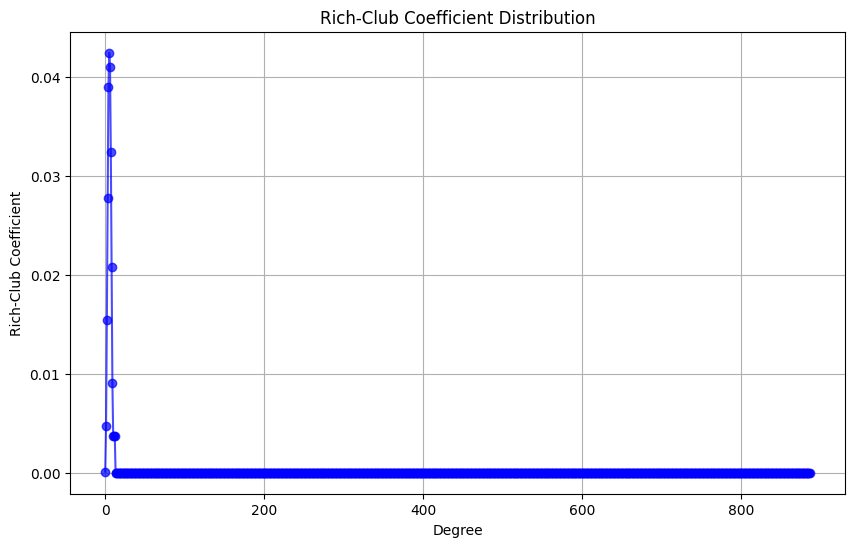

{0: 0.00011556112894818537,
 1: 0.004727761751466756,
 2: 0.015453515350995522,
 3: 0.02778799019607843,
 4: 0.03900928792569659,
 5: 0.042435616724012096,
 6: 0.04103641456582633,
 7: 0.0324208891477383,
 8: 0.020783564261825132,
 9: 0.009028727770177838}

In [ ]:
rich_club_coefficients = nx.rich_club_coefficient(undirected_subgraph, normalized=False)

plt.figure(figsize=(10, 6))
plt.plot(list(rich_club_coefficients.keys()), list(rich_club_coefficients.values()), color='blue', marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Coefficient Distribution')
plt.grid(True)
plt.show()

rich_club_coefficients_sample = {k: rich_club_coefficients[k] for k in sorted(rich_club_coefficients.keys())[:10]}
rich_club_coefficients_sample

# 10- Analyse de la Résilience du Réseau

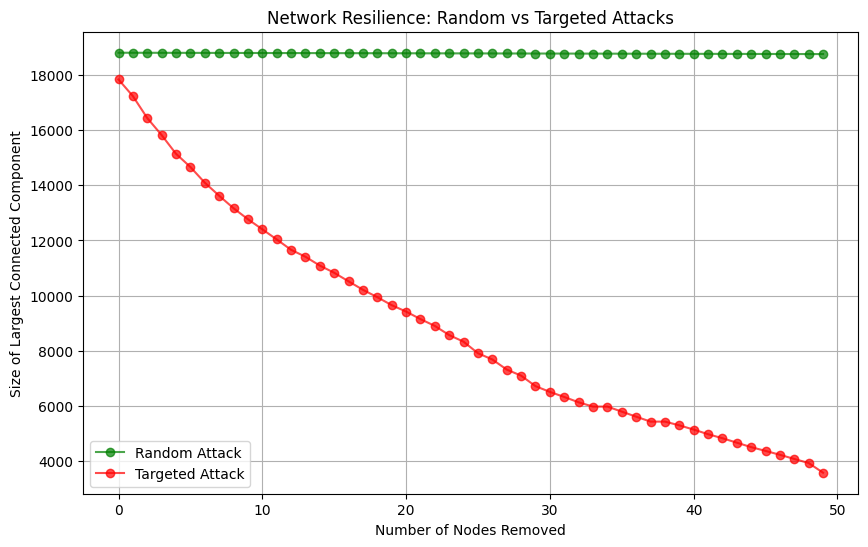

In [ ]:
def largest_connected_component_size(graph):
    if isinstance(graph, nx.Graph):
        return len(max(nx.connected_components(graph), key=len))
    else:
        return len(max(nx.weakly_connected_components(graph), key=len))

graph_resilience_random = undirected_subgraph.copy()
graph_resilience_targeted = undirected_subgraph.copy()

# scenario 1 : Supprimez les noeuds de maniere aléatoire
num_nodes_to_remove = 50
random_nodes = random.sample(list(graph_resilience_random.nodes), num_nodes_to_remove)

largest_cc_sizes_random = []
for node in random_nodes:
    graph_resilience_random.remove_node(node)
    largest_cc_sizes_random.append(largest_connected_component_size(graph_resilience_random))

# scenario 2: Supprimez les noeuds avec le degré de centralité le plus élevé
degree_centrality_sorted = sorted(graph_resilience_targeted.degree, key=lambda x: x[1], reverse=True)
targeted_nodes = [node for node, _ in degree_centrality_sorted[:num_nodes_to_remove]]

largest_cc_sizes_targeted = []
for node in targeted_nodes:
    graph_resilience_targeted.remove_node(node)
    largest_cc_sizes_targeted.append(largest_connected_component_size(graph_resilience_targeted))

plt.figure(figsize=(10, 6))
plt.plot(range(num_nodes_to_remove), largest_cc_sizes_random, label='Random Attack', color='green', linestyle='-', marker='o', alpha=0.7)
plt.plot(range(num_nodes_to_remove), largest_cc_sizes_targeted, label='Targeted Attack', color='red', linestyle='-', marker='o', alpha=0.7)
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Network Resilience: Random vs Targeted Attacks')
plt.legend()
plt.grid(True)
plt.show()


# 11- Centralite Harmonique

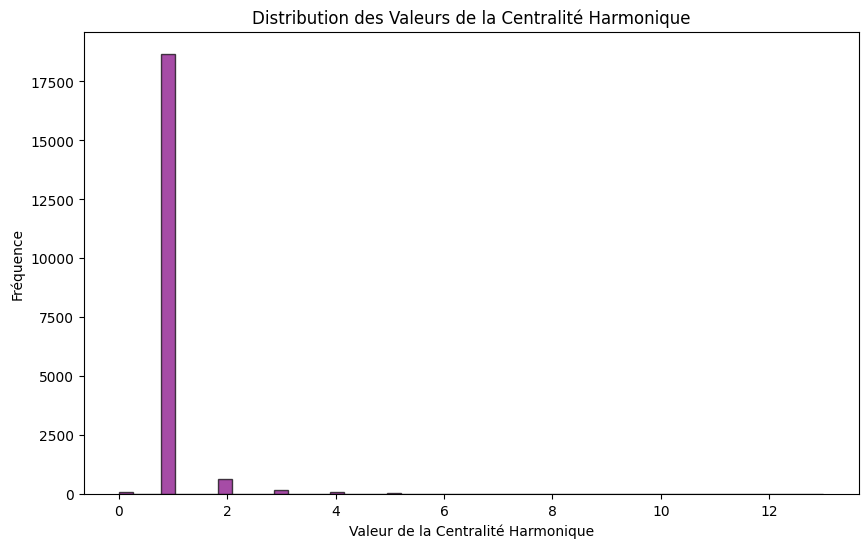

Top 10 des nœuds par centralité harmonique :
Noeud: 15846407, Centralité Harmonique: 13.0
Noeud: 166739404, Centralité Harmonique: 10.0
Noeud: 17919972, Centralité Harmonique: 10.0
Noeud: 813286, Centralité Harmonique: 9.0
Noeud: 23375688, Centralité Harmonique: 9.0
Noeud: 176566242, Centralité Harmonique: 9.0
Noeud: 85452649, Centralité Harmonique: 9.0
Noeud: 2391232105, Centralité Harmonique: 9.0
Noeud: 783214, Centralité Harmonique: 9.0
Noeud: 26257166, Centralité Harmonique: 8.0


In [ ]:
harmonic_centrality = nx.harmonic_centrality(G)

harmonic_values = list(harmonic_centrality.values())

plt.figure(figsize=(10, 6))
plt.hist(harmonic_values, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Valeur de la Centralité Harmonique')
plt.ylabel('Fréquence')
plt.title('Distribution des Valeurs de la Centralité Harmonique')
plt.show()

top_harmonic_nodes = sorted(harmonic_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("Top 10 des nœuds par centralité harmonique :")
for node, value in top_harmonic_nodes:
    print(f"Noeud: {node}, Centralité Harmonique: {value}")


# 12- Eigenvector Centrality

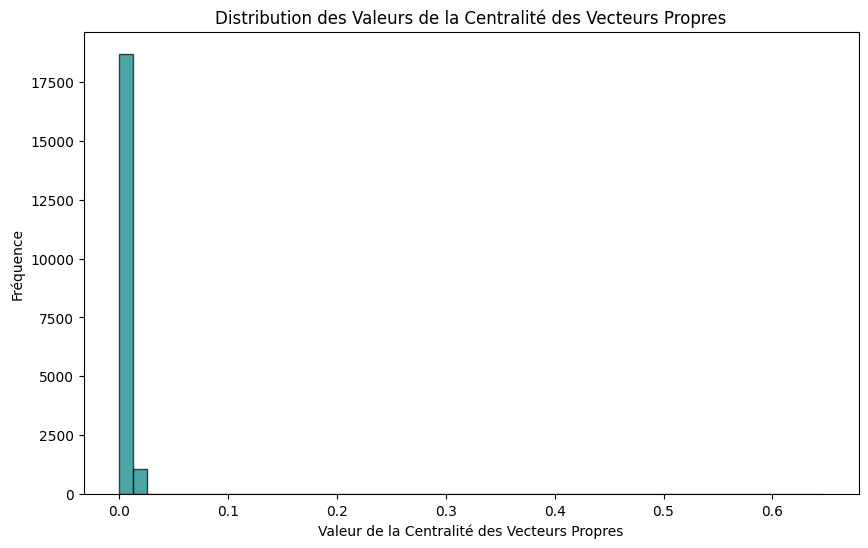

Top 10 des nœuds par centralité des vecteurs propres :
Nœud: 451819350, Centralité des Vecteurs Propres: 0.6467995180156473
Nœud: 2331525829, Centralité des Vecteurs Propres: 0.19835086714891131
Nœud: 543355544, Centralité des Vecteurs Propres: 0.15530384424791976
Nœud: 3336015731, Centralité des Vecteurs Propres: 0.09414653666400055
Nœud: 1187590927, Centralité des Vecteurs Propres: 0.05721293507875089
Nœud: 2402477665, Centralité des Vecteurs Propres: 0.04393961307857196
Nœud: 85452649, Centralité des Vecteurs Propres: 0.03587907137033904
Nœud: 166739404, Centralité des Vecteurs Propres: 0.03472502647760568
Nœud: 25460615, Centralité des Vecteurs Propres: 0.03445315099360065
Nœud: 14230524, Centralité des Vecteurs Propres: 0.034336028481877987


In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G.to_undirected(), max_iter=1000)

eigenvector_values = list(eigenvector_centrality.values())

plt.figure(figsize=(10, 6))
plt.hist(eigenvector_values, bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Valeur de la Centralité des Vecteurs Propres')
plt.ylabel('Fréquence')
plt.title('Distribution des Valeurs de la Centralité des Vecteurs Propres')
plt.show()

top_eigenvector_nodes = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("Top 10 des nœuds par centralité des vecteurs propres :")
for node, value in top_eigenvector_nodes:
    print(f"Nœud: {node}, Centralité des Vecteurs Propres: {value}")


# 13- PageRank

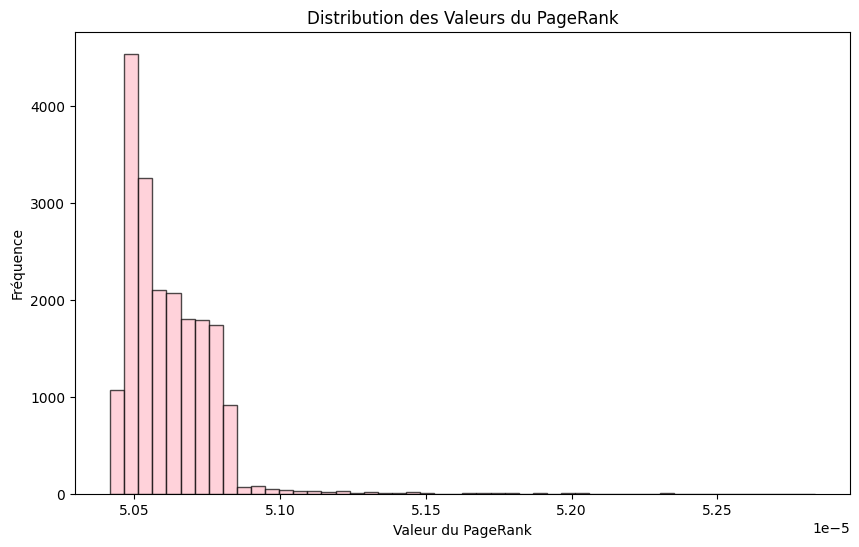

Top 10 des nœuds par PageRank :
Nœud: 15846407, PageRank: 5.283417266584084e-05
Nœud: 2391232105, PageRank: 5.265631889120187e-05
Nœud: 573299587, PageRank: 5.238356428935145e-05
Nœud: 1429480158, PageRank: 5.233618273793752e-05
Nœud: 176566242, PageRank: 5.2322080923014266e-05
Nœud: 17919972, PageRank: 5.2306239639958095e-05
Nœud: 335141638, PageRank: 5.226695376776365e-05
Nœud: 476675010, PageRank: 5.225323552933534e-05
Nœud: 221412285, PageRank: 5.2195432138914954e-05
Nœud: 26257166, PageRank: 5.2186658939528835e-05


In [ ]:
pagerank = nx.pagerank(G, alpha=0.85)

pagerank_values = list(pagerank.values())

plt.figure(figsize=(10, 6))
plt.hist(pagerank_values, bins=50, color='pink', edgecolor='black', alpha=0.7)
plt.xlabel('Valeur du PageRank')
plt.ylabel('Fréquence')
plt.title('Distribution des Valeurs du PageRank')
plt.show()

top_pagerank_nodes = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:10]
print("Top 10 des nœuds par PageRank :")
for node, value in top_pagerank_nodes:
    print(f"Nœud: {node}, PageRank: {value}")


# 14- Algorithme de Louvain

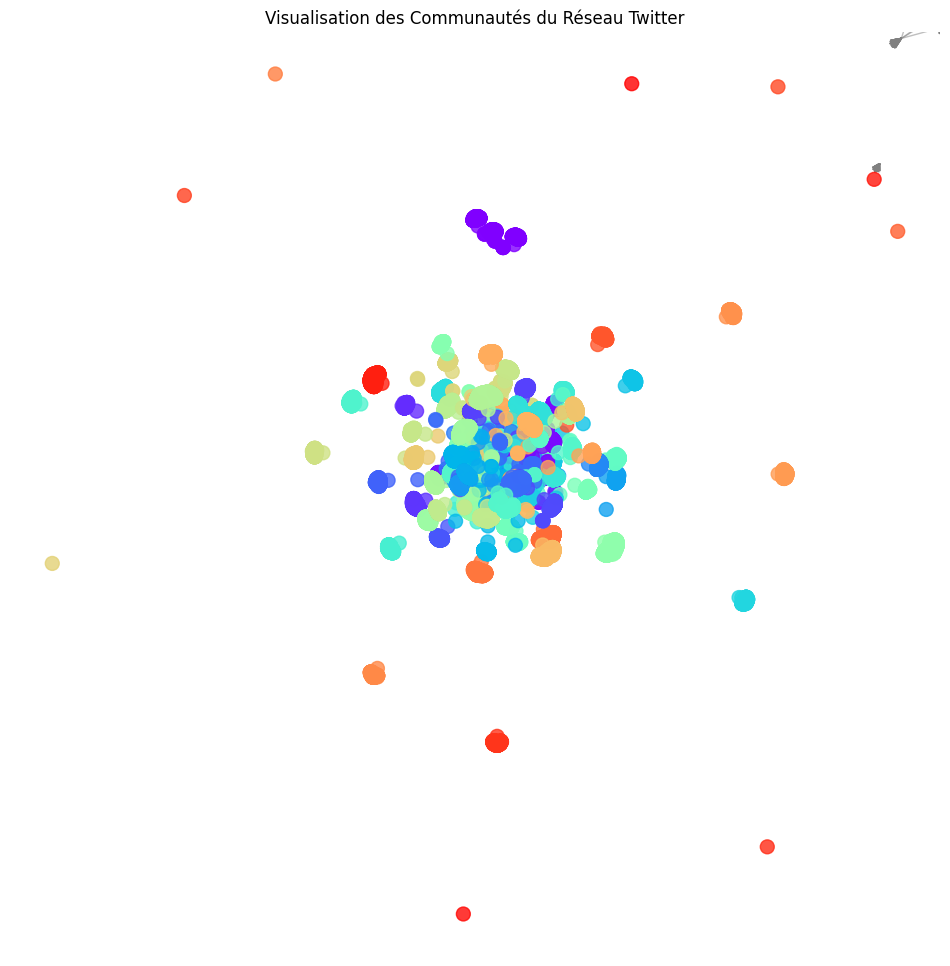

In [ ]:
G_non_direct = G.to_undirected()
partition = community_louvain.best_partition(G_non_direct)

pos = nx.spring_layout(G_non_direct, seed=42)

plt.figure(figsize=(12, 12))

colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G_non_direct, pos, node_size=100, node_color=colors, cmap=plt.cm.rainbow, alpha=0.8)

nx.draw_networkx_edges(G_non_direct, pos, alpha=0.5, edge_color='gray')

plt.axis('off')
plt.title("Visualisation des Communautés du Réseau Twitter")
plt.show()
